In [1]:
import spacy
import pandas as pd

import json
import spacy
import requests
import random
import time

import spacy
import tqdm
from collections import Counter

import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

import pyLDAvis
import pyLDAvis.gensim

In [15]:
df = pd.read_csv("C:/Users/ASUS/Desktop/SciencesPo/Social Media Analysis/df.csv")
nlp = spacy.load("en_core_web_sm")

In [14]:
df['combined_text'] = df['headline'] + ' ' + df['lead_paragraph']
df['combined_text'] = df['combined_text'].astype(str)
texts = df['combined_text'].tolist()
spacydocs = []
for text in tqdm.tqdm(texts):
    spacydocs.append(nlp(text))
adjectives = []
for doc in spacydocs:
    for token in doc:
        if token.pos_ == "ADJ":
            adjectives.append(token.text)
    
print(Counter(adjectives).most_common(10))

100%|██████████| 360/360 [00:12<00:00, 28.60it/s]

[('Chinese', 111), ('American', 76), ('new', 31), ('other', 26), ('economic', 22), ('pandemic', 21), ('more', 19), ('foreign', 18), ('top', 17), ('global', 17)]


In [16]:
def extract_persons(text):
    doc = nlp(text)
    persons = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    return persons

all_persons = []
for paragraph in texts:
    persons = extract_persons(paragraph)
    all_persons.extend(persons)
    
person_counts = Counter(all_persons)
most_common_persons = person_counts.most_common(10)
print(most_common_persons)

[('Trump', 87), ('Biden', 17), ('Mike Pompeo', 16), ('Joseph R. Biden Jr.', 8), ('Xi Jinping', 7), ('Rodrigo Duterte', 4), ('Joe Biden', 3), ('William P. Barr', 2), ('Karen Pierce', 2), ('Twitter', 2)]


In [17]:
import matplotlib.pyplot as plt

In [20]:
df.date=pd.to_datetime(df.date)
df.index=df.date
counts = df.set_index('date').resample("W").count()

,headline,lead_paragraph
date,,
2020-01-26 00:00:00+00:00,2,2
2020-02-02 00:00:00+00:00,10,10
2020-02-09 00:00:00+00:00,8,8
2020-02-16 00:00:00+00:00,8,8
2020-02-23 00:00:00+00:00,6,6
2020-03-01 00:00:00+00:00,0,0
2020-03-08 00:00:00+00:00,5,5
2020-03-15 00:00:00+00:00,5,5
2020-03-22 00:00:00+00:00,8,8


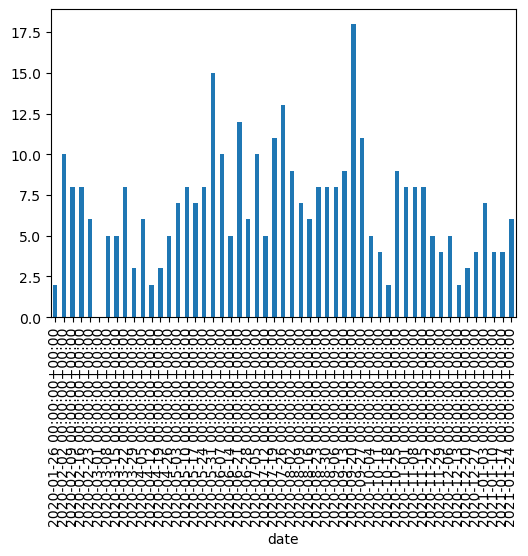

In [19]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
counts["headline"].plot(kind='bar',ax=ax)
plt.show()